# 🧭 CRISP-DM — Ready-to-Run Colab Template
This notebook **asks you to upload a dataset** (CSV/Excel) and walks through all six CRISP-DM phases.

Run cells top-to-bottom. No file paths required.


## 1) Business Understanding

In [5]:
#@title Describe your business goal
business_goal = "<Predict which passengers were more likely to survive the Titanic shipwreck based on their personal and ticket information.>"
print('Business Goal:', business_goal)

Business Goal: <Predict which passengers were more likely to survive the Titanic shipwreck based on their personal and ticket information.>


## 2) Data Understanding

In [2]:
#@title Upload your dataset (CSV or Excel)
from google.colab import files
import pandas as pd, io
up = files.upload()
assert up, 'No file uploaded.'
fname = list(up.keys())[0]
print('Using file:', fname)
if fname.lower().endswith('.csv'):
    df = pd.read_csv(io.BytesIO(up[fname]))
else:
    df = pd.read_excel(io.BytesIO(up[fname]))
display(df.head())
print('\nInfo:')
print(df.dtypes)
print('\nMissing values per column:\n', df.isna().sum())
display(df.describe(include='all').transpose())

Saving train.csv to train.csv
Using file: train.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


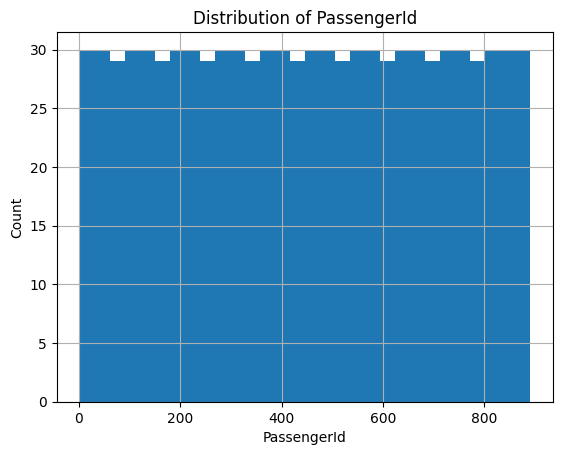

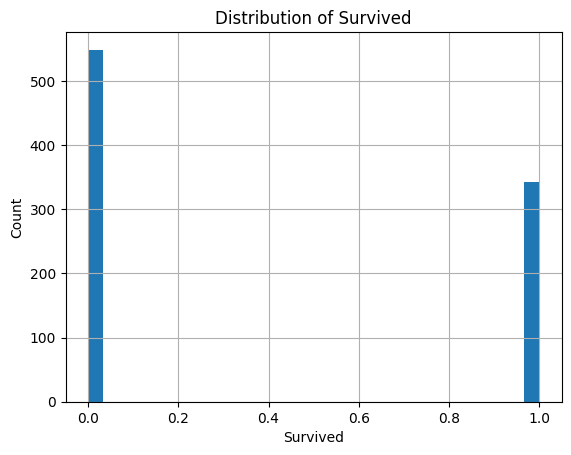

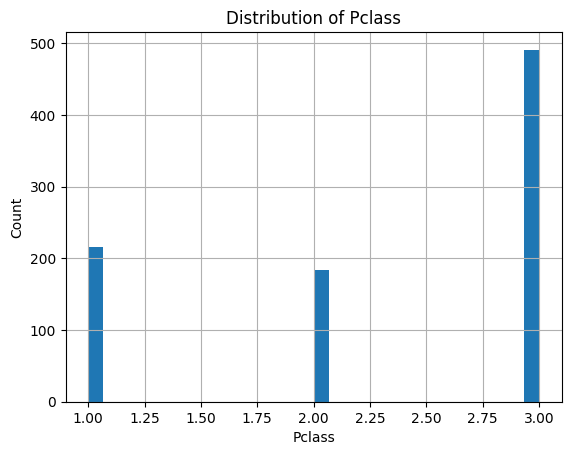

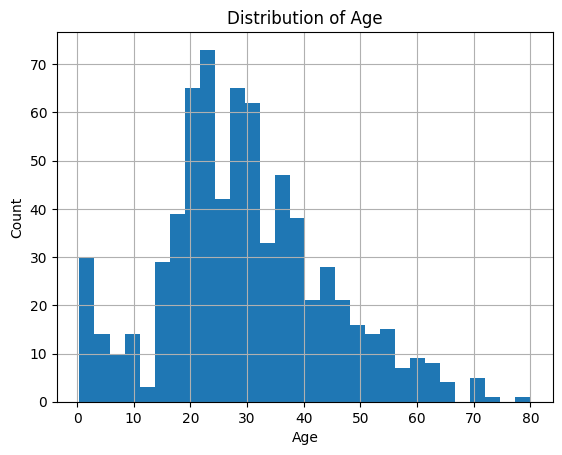

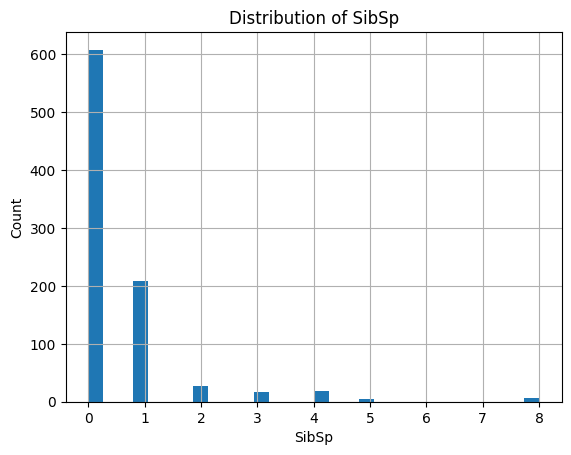

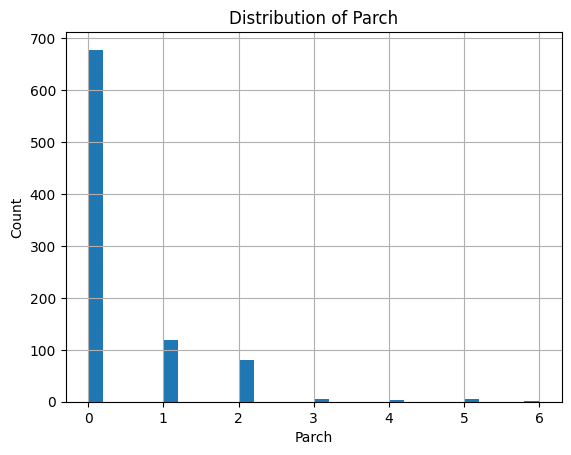

In [3]:
#@title Quick numeric distributions (matplotlib only)
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['number']).columns.tolist()
for col in num_cols[:6]:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## 3) Data Preparation

In [4]:
#@title Choose target and task type (classification or regression)
target = input('Enter TARGET column name (exact): ').strip()
task_type = input('Type "c" for classification or "r" for regression: ').strip().lower()
assert target in df.columns, f'Column {target} not found.'

# Simple baseline prep: drop rows with any NA
df_prep = df.dropna(axis=0, how='any').copy()
y = df_prep[target]
X = pd.get_dummies(df_prep.drop(columns=[target]), drop_first=True)
print('Prepared X shape:', X.shape)
print('Prepared y length:', len(y))

Enter TARGET column name (exact): Survived
Type "c" for classification or "r" for regression: c
Prepared X shape: (183, 449)
Prepared y length: 183


## 4) Modeling

In [6]:
#@title Train/Test split + model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train:', X_train.shape, ' Test:', X_test.shape)
if task_type == 'c':
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
elif task_type == 'r':
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(random_state=42)
else:
    raise ValueError('Use "c" or "r"')
model.fit(X_train, y_train)
print('Model trained.')

Train: (146, 449)  Test: (37, 449)
Model trained.


## 5) Evaluation

Accuracy: 0.6756756756756757
F1 (weighted): 0.6348348348348349

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.29      0.40        14
           1       0.68      0.91      0.78        23

    accuracy                           0.68        37
   macro avg       0.67      0.60      0.59        37
weighted avg       0.67      0.68      0.63        37



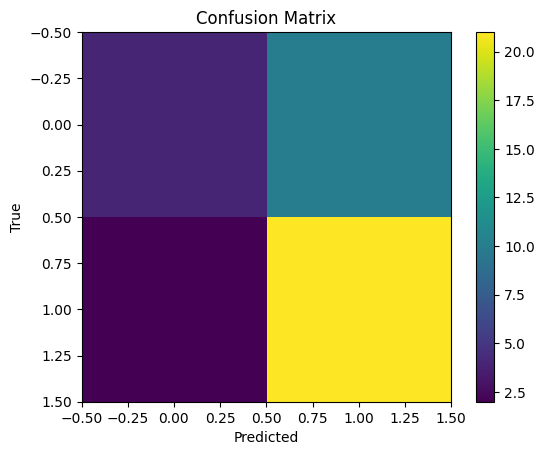

In [7]:
#@title Evaluate the model
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    mean_absolute_error, r2_score
)
preds = model.predict(X_test)
if task_type == 'c':
    print('Accuracy:', accuracy_score(y_test, preds))
    try:
        print('F1 (weighted):', f1_score(y_test, preds, average='weighted'))
    except Exception as e:
        print('F1 not available:', e)
    print('\nClassification report:\n', classification_report(y_test, preds))
    try:
        cm = confusion_matrix(y_test, preds)
        plt.figure()
        plt.imshow(cm)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.colorbar()
        plt.show()
    except Exception as e:
        print('Could not plot confusion matrix:', e)
else:
    print('MAE:', mean_absolute_error(y_test, preds))
    print('R²:', r2_score(y_test, preds))

## 6) (Mini) Deployment

In [8]:
#@title Save model + feature list
import os, joblib
art_dir = 'artifacts_crispdm'
os.makedirs(art_dir, exist_ok=True)
joblib.dump(model, os.path.join(art_dir, 'model.joblib'))
import pandas as pd
pd.Series(X.columns).to_csv(os.path.join(art_dir, 'features.csv'), index=False)
print('Saved artifacts to', art_dir)

Saved artifacts to artifacts_crispdm


### Report Checklist
- **Business Understanding**: Goal & success criteria
- **Data Understanding**: Columns, types, missingness
- **Data Preparation**: Cleaning/encoding decisions
- **Modeling**: Algorithm + params
- **Evaluation**: Metrics + interpretation
- **Deployment**: What artifacts you produced